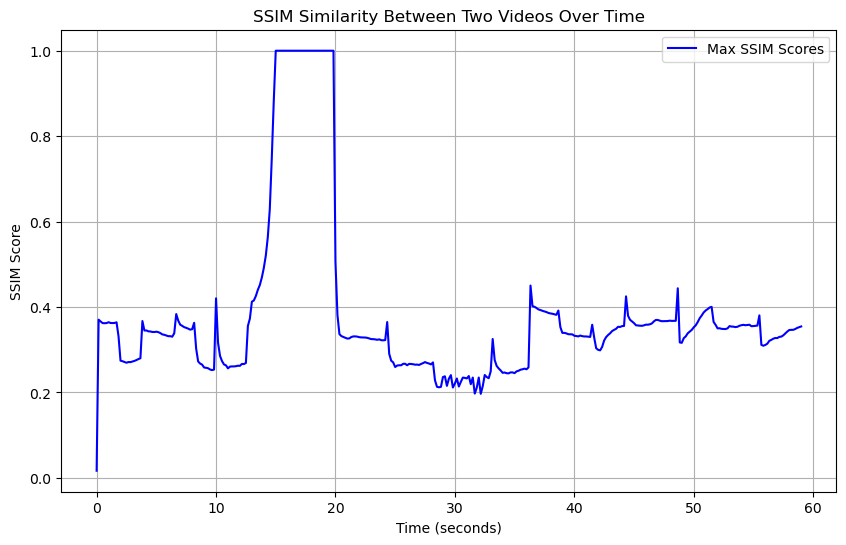

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(video1_path, video2_path, frame_skip=5, early_stop_threshold=0.9):
    # Open the video files
    video1 = cv2.VideoCapture(video1_path)
    video2 = cv2.VideoCapture(video2_path)

    fps = video1.get(cv2.CAP_PROP_FPS)  # Get the frames per second (FPS) of the video

    ssim_scores = []
    time_stamps = []
    frame_index = 0

    # Read all frames from video2 and store them
    video2_frames = []
    while True:
        ret2, frame2 = video2.read()
        if not ret2:
            break
        video2_frames.append(frame2)
    
    # Iterate through each frame in video1 with subsampling
    while True:
        ret1, frame1 = video1.read()
        if not ret1:
            break

        # Skip frames based on the frame_skip parameter
        if frame_index % frame_skip != 0:
            frame_index += 1
            continue
        
        # Calculate the time in seconds for the current frame
        time_in_seconds = frame_index / fps
        time_stamps.append(time_in_seconds)

        # Resize and convert video1 frame to grayscale
        gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

        max_ssim = -1  # Initialize with a low SSIM score

        # Compare the current frame1 with all frames in video2
        for frame2 in video2_frames:
            if frame1.shape != frame2.shape:
                frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))
            
            # Convert video2 frame to grayscale
            gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
            
            # Calculate SSIM between the two frames
            score, _ = ssim(gray1, gray2, full=True)
            
            # Keep track of the highest SSIM score for this frame
            if score > max_ssim:
                max_ssim = score

            # Early stopping if we reach the threshold
            if max_ssim >= early_stop_threshold:
                break

        ssim_scores.append(max_ssim)
        frame_index += 1

    # Release the video files
    video1.release()
    video2.release()

    return ssim_scores, time_stamps

def plot_ssim_scores(ssim_scores, time_stamps):
    # Plotting the SSIM scores as a line chart
    plt.figure(figsize=(10, 6))
    plt.plot(time_stamps, ssim_scores, label="Max SSIM Scores", color="blue")
    plt.xlabel("Time (seconds)")
    plt.ylabel("SSIM Score")
    plt.title("SSIM Similarity Between Two Videos Over Time")
    plt.grid(True)
    plt.legend()
    plt.show()

# Provide your video paths here
video1_path = 'path_to_video1.mp4'
video2_path = 'path_to_video2.mp4'

small_clip_path = 'TestAudio1/LargeVideoWhatsapp_Clipped.mp4' #'TestAudio1/LargeVideoWhatsapp_Clipped.mp4'
large_video_path = 'TestAudio1/LargeVideoWhatsapp.mp4'
# Calculate SSIM scores with subsampling and early stopping
ssim_scores, time_stamps = calculate_ssim(large_video_path, small_clip_path, frame_skip=5, early_stop_threshold=1)

# Plot the SSIM scores
plot_ssim_scores(ssim_scores, time_stamps)


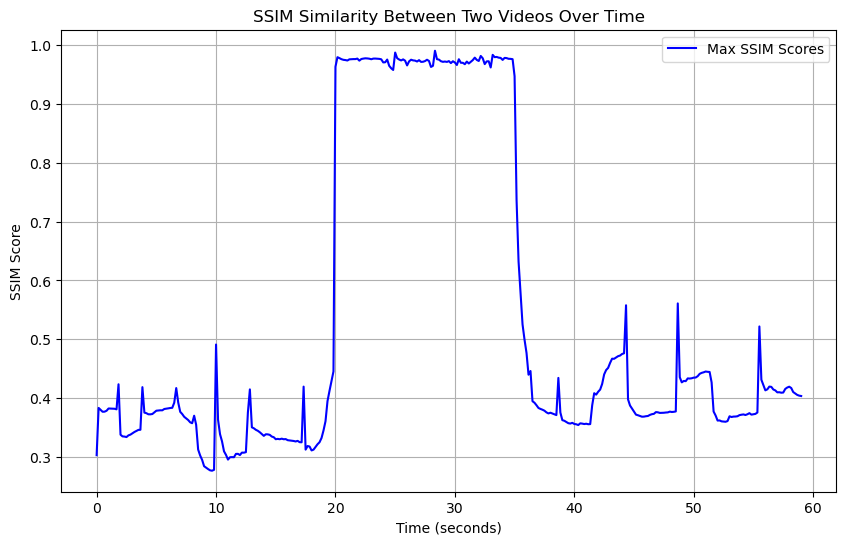

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(video1_path, video2_path, frame_skip=5, early_stop_threshold=0.9):
    # Open the video files
    video1 = cv2.VideoCapture(video1_path)
    video2 = cv2.VideoCapture(video2_path)

    fps = video1.get(cv2.CAP_PROP_FPS)  # Get the frames per second (FPS) of the video

    ssim_scores = []
    time_stamps = []
    frame_index = 0

    # Read all frames from video2 and store them
    video2_frames = []
    while True:
        ret2, frame2 = video2.read()
        if not ret2:
            break
        video2_frames.append(frame2)
    
    # Iterate through each frame in video1 with subsampling
    while True:
        ret1, frame1 = video1.read()
        if not ret1:
            break

        # Skip frames based on the frame_skip parameter
        if frame_index % frame_skip != 0:
            frame_index += 1
            continue
        
        # Calculate the time in seconds for the current frame
        time_in_seconds = frame_index / fps
        time_stamps.append(time_in_seconds)

        # Resize and convert video1 frame to grayscale
        gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

        max_ssim = -1  # Initialize with a low SSIM score

        # Compare the current frame1 with all frames in video2
        for frame2 in video2_frames:
            if frame1.shape != frame2.shape:
                frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))
            
            # Convert video2 frame to grayscale
            gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
            
            # Calculate SSIM between the two frames
            score, _ = ssim(gray1, gray2, full=True)
            
            # Keep track of the highest SSIM score for this frame
            if score > max_ssim:
                max_ssim = score

            # Early stopping if we reach the threshold
            if max_ssim >= early_stop_threshold:
                break

        ssim_scores.append(max_ssim)
        frame_index += 1

    # Release the video files
    video1.release()
    video2.release()

    return ssim_scores, time_stamps

def plot_ssim_scores(ssim_scores, time_stamps):
    # Plotting the SSIM scores as a line chart
    plt.figure(figsize=(10, 6))
    plt.plot(time_stamps, ssim_scores, label="Max SSIM Scores", color="blue")
    plt.xlabel("Time (seconds)")
    plt.ylabel("SSIM Score")
    plt.title("SSIM Similarity Between Two Videos Over Time")
    plt.grid(True)
    plt.legend()
    plt.show()

# Provide your video paths here
video1_path = 'path_to_video1.mp4'
video2_path = 'path_to_video2.mp4'

# small_clip_path = 'TestAudio1/LargeVideoWhatsapp_Clipped_NoiseAdded.mp4'
# large_video_path = 'TestAudio1/LargeVideoWhatsapp.mp4'
small_clip_path = 'TestAudio1/LargeVideoWhatsapp_Clipped_NoiseAdded.mp4' #'TestAudio1/LargeVideoWhatsapp_Clipped.mp4'
large_video_path = 'TestAudio1/LargeVideoWhatsapp.mp4'
# Calculate SSIM scores with subsampling and early stopping
ssim_scores, time_stamps = calculate_ssim(large_video_path, small_clip_path, frame_skip=5, early_stop_threshold=1)

# Plot the SSIM scores
plot_ssim_scores(ssim_scores, time_stamps)


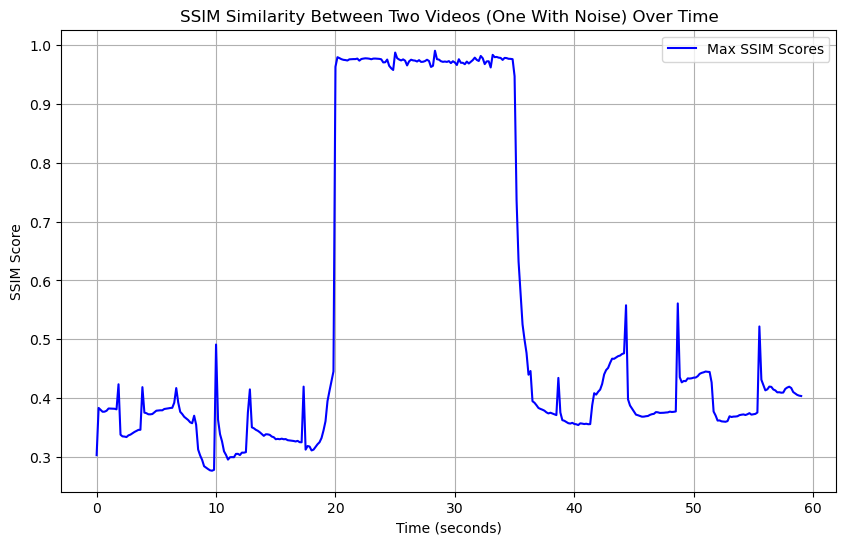

In [4]:
def plot_ssim_scores(ssim_scores, time_stamps):
    # Plotting the SSIM scores as a line chart
    plt.figure(figsize=(10, 6))
    plt.plot(time_stamps, ssim_scores, label="Max SSIM Scores", color="blue")
    plt.xlabel("Time (seconds)")
    plt.ylabel("SSIM Score")
    plt.title("SSIM Similarity Between Two Videos (One With Noise) Over Time")
    plt.grid(True)
    plt.legend()
    plt.show()
plot_ssim_scores(ssim_scores, time_stamps)
